## Introduction

The data is provided by Home Credit, a service dedicated to provided lines of credit (loans) to the unbanked population. Predicting whether or not a client will repay a loan or have difficulty is a critical business need.

## Data understanding

#### EDA: Exploring and cleaning

EDA is an open-ended procedure in which we calculate statistics and produce figures to uncover trends, anomalies, patterns, or links in data. EDA's purpose is to discover what our data can tell us. It usually begins with a high-level overview and then narrows down to particular regions when we discover interesting sections of the data. The findings may be fascinating in and of itself, or they may be utilized to guide our modeling decisions, such as which characteristics to employ.

In [1]:
# Load libraries
import pandas as pd #Manipulate and analyze data using python
#import matplotlib as plt #data visualization and graphic plotting
import matplotlib.pyplot as plt #data visualization and graphic plotting
import seaborn as sns #visualisation
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

### Load dataset

In [2]:
# load dataset
df = pd.read_csv("application_data.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.shape

(307511, 122)

The function shape is used to show the number of observations, in this case, 307511 rows, and numbers of features or variable, 122 columns. The data has 307511 observations (each one a separate loan) and 122 features (variables) including the TARGET (the label I want to predict).

In [4]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


At this point , it is possible to calculate The five number summary, from the function describe () below, that function gives us an overview of what the data set looks like, they are: The minimum, Q1( the first quartile, or the 25% mark), the median (the middle point, or the 50% mark), Q3 (the third quartile, or the 75% mark) and The maximum. Moreover, it shows the mean, the standard deviation and counts all rows, of each numerical variable.

In [5]:
df.describe(include=object)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


In [6]:
duplicate_rows=df[df.duplicated()]
print('Number of duplicate rows: ',duplicate_rows.shape[0])

Number of duplicate rows:  0


It was checked the duplicates rows, in this case don`t have duplicate. 

### Checking missing values

In [7]:
df.isnull().values.any()

True

In [8]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [9]:
missing_values=df.isnull().sum().sum()
print("Number of missing values: ", missing_values)

Number of missing values:  9152465


It shows if there is any missing data in any column, represented as "True" and the summatory for each column. The total number of NA is 9152465. However, as we can see in the table below, missing values are present in each feature. For this reason, I decided to group all the misspelled forms of "NA".

In [10]:
missing_value_formats=["n.a","?","NA","n/a","na","--","n-a"]
df=pd.read_csv('application_data.csv',na_values=missing_value_formats)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

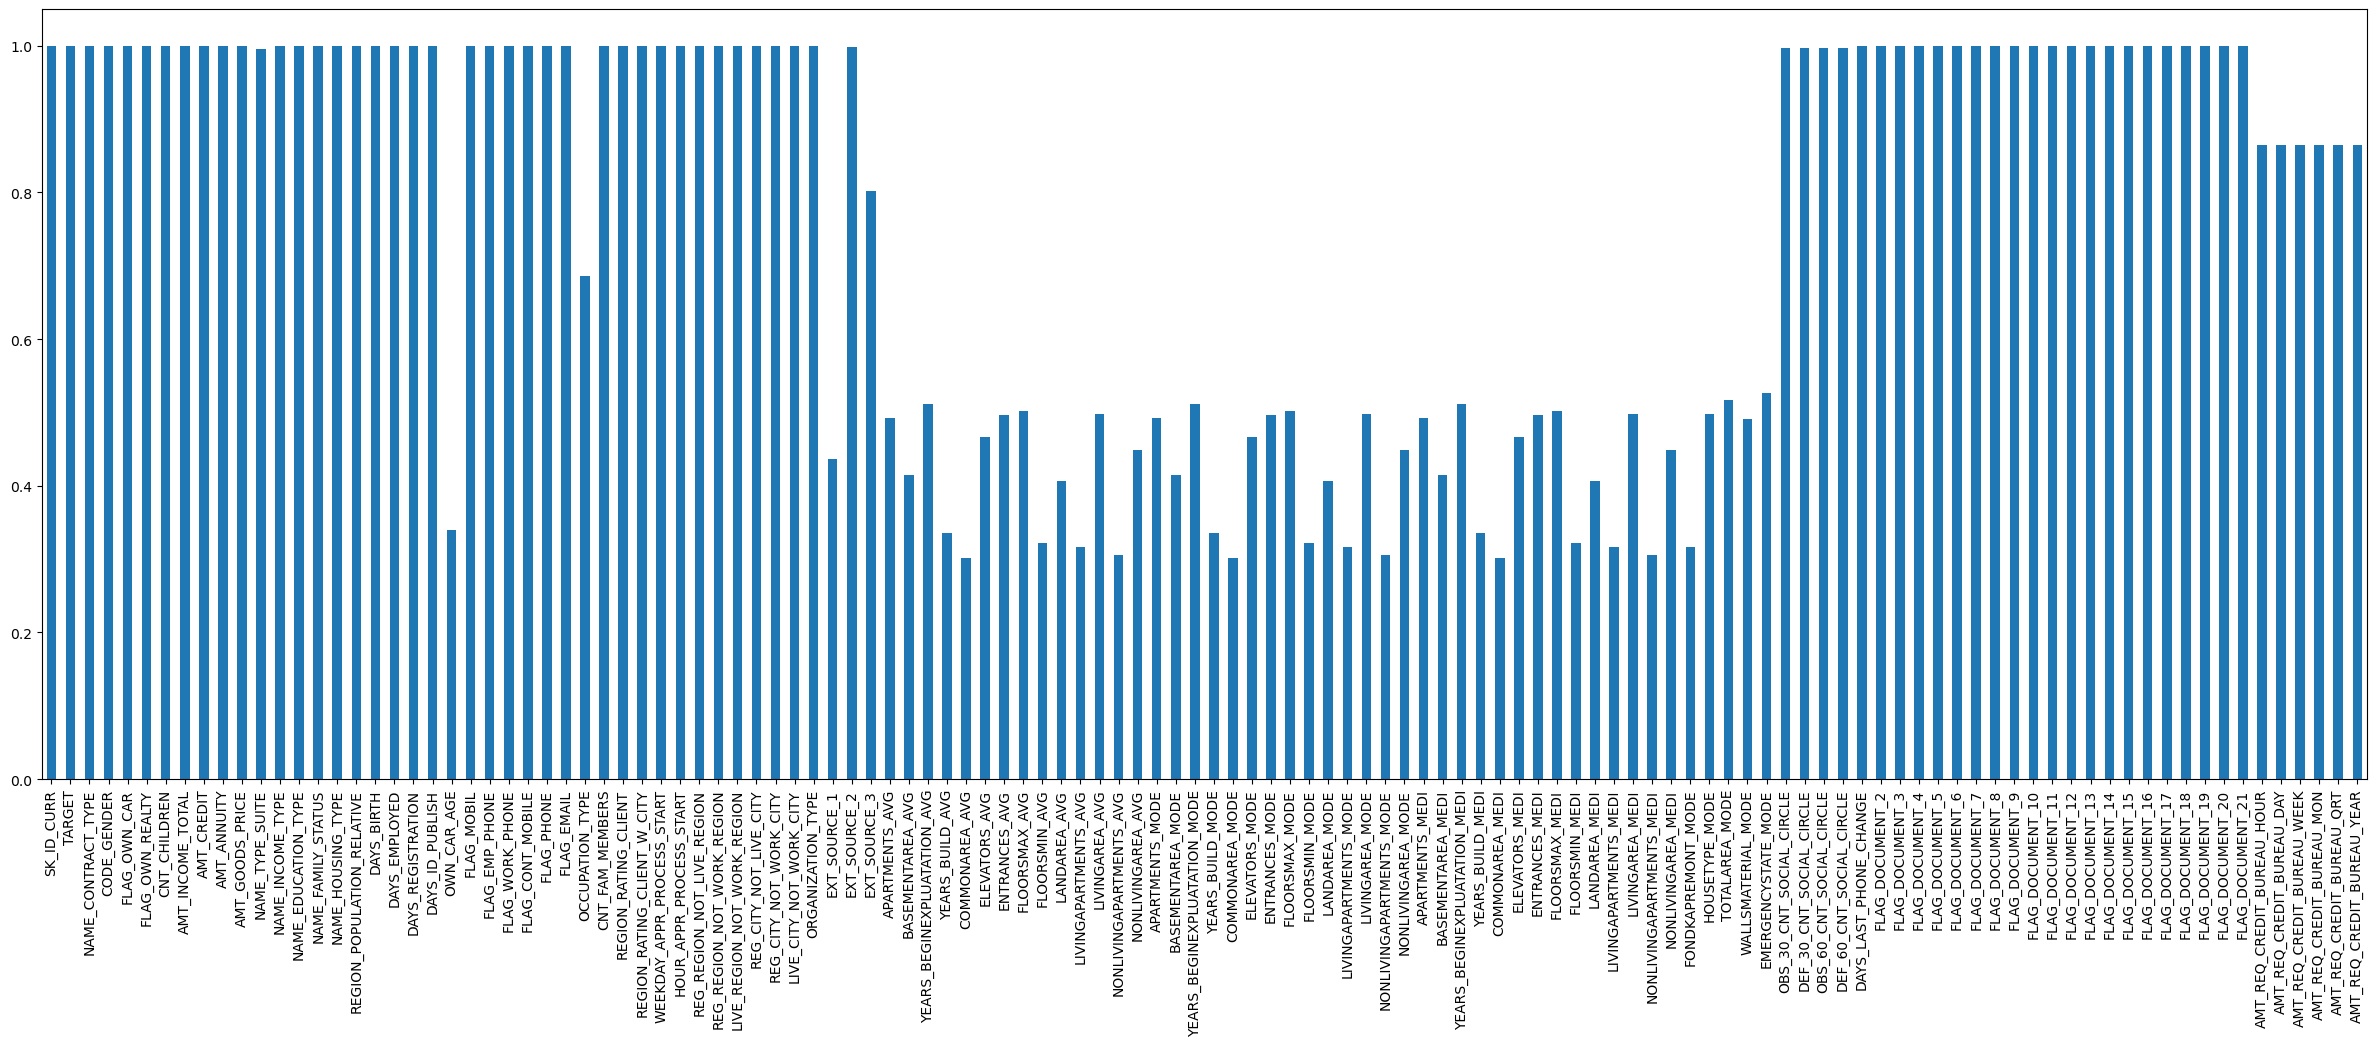

In [11]:
fig, ax = plt.subplots(figsize=(30,10))
(1-df.isnull().mean()).abs().plot.bar(ax=ax)

In the figure, we observe the amount of missing NA for each feature

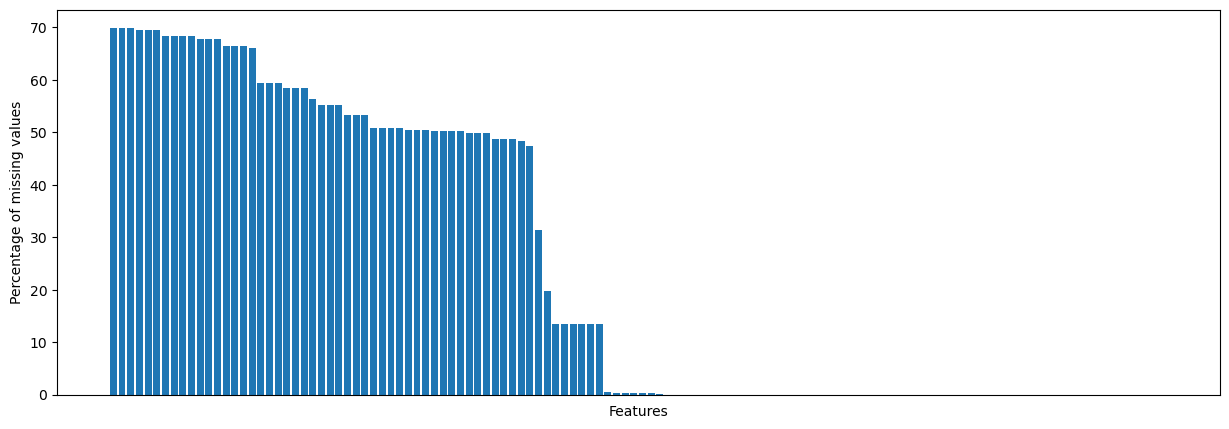

In [12]:
# calculating the percentage of missing values for each feature

df_na = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by = 0, ascending = False)

fig, ax = plt.subplots(figsize = (15,5))
ax.bar(df_na.index, df_na.values.T[0])
plt.xticks([])
plt.xlabel("Features")
plt.ylabel("Percentage of missing values")
plt.show()

In [13]:
cols_na = df_na[df_na[0]>60]
print("There are " + str(len(cols_na)) + " columns with NaNs above 60%.")


There are 17 columns with NaNs above 60%.


In [14]:
cols_to_drop = list(cols_na.index)
cols_to_drop

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE']

After getting NA information we checked how many columns have more than 60% of missing data for later drop (Yiran Dong et al., 2013). 

In [15]:
df = df.drop(columns = ['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE'])
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df.shape

(307511, 105)

After that I deleted 46 more columns that are not important for the study.

In [17]:
df_new = df.drop(columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'LANDAREA_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'LANDAREA_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'LANDAREA_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT'])
df_new

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0,1.0
1,100003,0,Cash loans,F,N,N,0,Family,State servant,Higher education,...,0,0,0,0,0,0,0,0,0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,Unaccompanied,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0,0.0
3,100006,0,Cash loans,F,N,Y,0,Unaccompanied,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0,NaN
4,100007,0,Cash loans,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,Unaccompanied,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0,NaN
307507,456252,0,Cash loans,F,N,Y,0,Unaccompanied,Pensioner,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0,NaN
307508,456253,0,Cash loans,F,N,Y,0,Unaccompanied,Working,Higher education,...,0,0,0,0,0,0,0,0,0,1.0
307509,456254,1,Cash loans,F,N,Y,0,Unaccompanied,Commercial associate,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0,0.0


In [18]:
df_new.shape

(307511, 60)

Now, I have a new dataset with 307511 rows and 60 columns.

In [19]:
# Number of each type of column
df_new.dtypes.value_counts()

int64      41
object     15
float64     4
dtype: int64

In [20]:
# Get the descriptive statistics of all variables including categorical data
df_new.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,306219,307511,307511,...,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,7,8,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,Unaccompanied,Working,Secondary / secondary special,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,248526,158774,218391,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,NaN,NaN,NaN,...,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,NaN,NaN,NaN,...,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


### Analysis of few columns

First, I examined the target column distribution.
The purpose is to anticipate whether the loan was returned on schedule or whether the consumer encountered payment troubles. I'll start by counting the number of loans in each category.

In [21]:
df_new['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

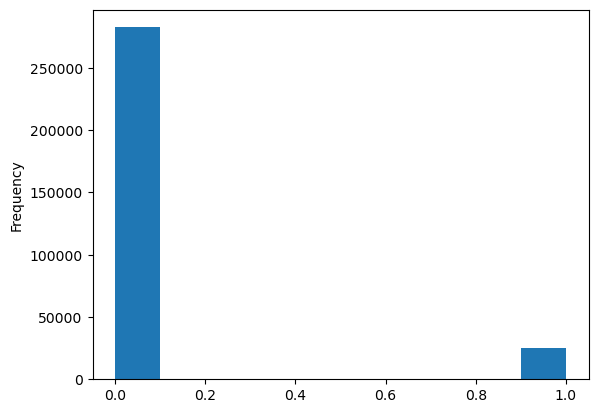

In [22]:
df_new['TARGET'].astype(int).plot.hist();

Based on available information, I believe there is an imbalanced class problem. Those that were repaid on time outnumber loans that were not repaid. Once I've developed more advanced machine learning models, I'll be able to weight the classes based on their representation in the data to account for this imbalance.

CODE_GENDER column

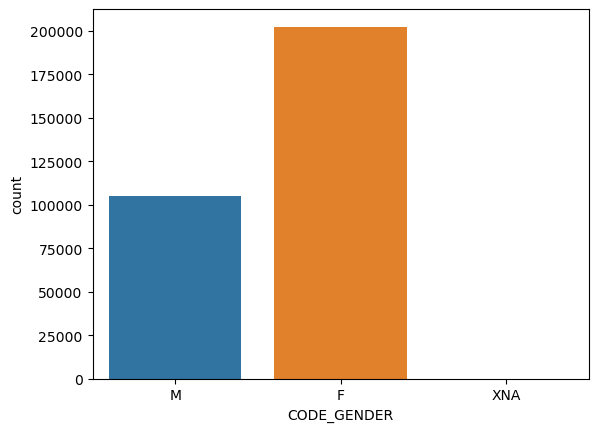

In [23]:
sns.countplot(x='CODE_GENDER',data=df_new)
plt.show()

ORGANIZATION_TYPE column

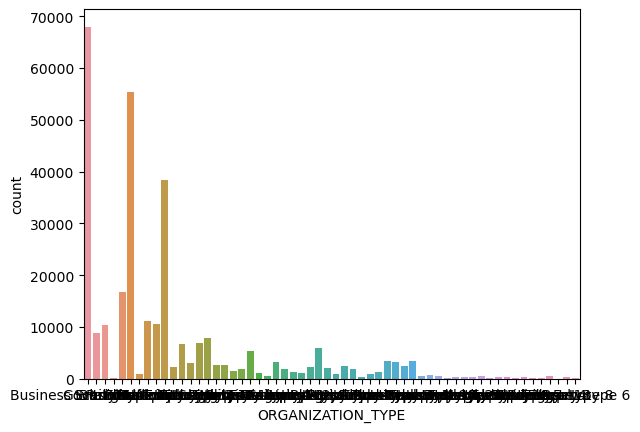

In [24]:
sns.countplot(x='ORGANIZATION_TYPE',data=df_new)
plt.show()

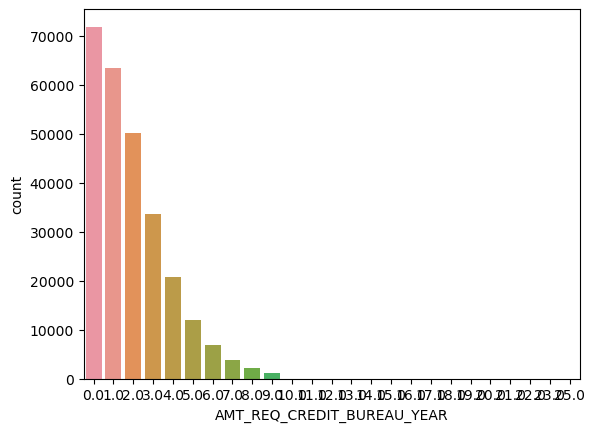

In [25]:
sns.countplot(x='AMT_REQ_CREDIT_BUREAU_YEAR',data=df_new)
plt.show()

<AxesSubplot:xlabel='AMT_REQ_CREDIT_BUREAU_YEAR'>

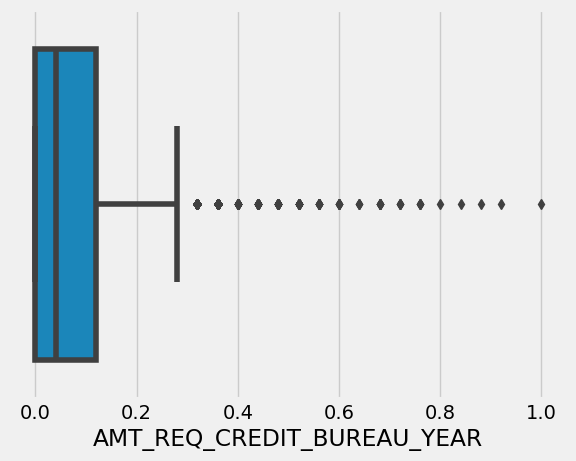

In [108]:
sns.boxplot(x=df_new['AMT_REQ_CREDIT_BUREAU_YEAR'])

### Normalizing data

In [26]:
from sklearn.preprocessing import MinMaxScaler

Normalization helps normalize features within a range, so ML models run faster and more accurately. . Normalization typically means rescaling the values into a range of [0,1]. (Geller, 2019). 

In [59]:
# Number of unique classes in each object column
df_new.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Series([], dtype: float64)

In [60]:
# one-hot encoding of categorical variables
df_new = pd.get_dummies(df)

In [61]:
df_new

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,-637,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,-1188,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,-225,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,-3039,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,-3038,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,9327,-236,...,0,0,0,0,0,0,1,0,1,0
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,20775,365243,...,0,0,0,0,0,0,1,0,1,0
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,14966,-7921,...,0,0,0,0,0,1,0,0,1,0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,11961,-4786,...,0,0,0,0,0,0,1,0,1,0


In [62]:
df_new.dtypes

SK_ID_CURR                           int64
TARGET                               int64
CNT_CHILDREN                         int64
AMT_INCOME_TOTAL                   float64
AMT_CREDIT                         float64
                                    ...   
WALLSMATERIAL_MODE_Panel             uint8
WALLSMATERIAL_MODE_Stone, brick      uint8
WALLSMATERIAL_MODE_Wooden            uint8
EMERGENCYSTATE_MODE_No               uint8
EMERGENCYSTATE_MODE_Yes              uint8
Length: 226, dtype: object

In [63]:
# Number of each type of column
df_new.dtypes.value_counts()

uint8      136
float64     49
int64       41
dtype: int64

In [64]:
df_new['EXT_SOURCE_1'].value_counts()

0.622707    5
0.443982    5
0.546426    5
0.581015    5
0.499002    5
           ..
0.658473    1
0.318295    1
0.834644    1
0.485406    1
0.734460    1
Name: EXT_SOURCE_1, Length: 114584, dtype: int64

In [65]:
min_max = MinMaxScaler(feature_range=(0,1))
df_new['EXT_SOURCE_1'] = min_max.fit_transform(df_new[['EXT_SOURCE_1']])
df_new.EXT_SOURCE_1

0         0.072215
1         0.312933
2              NaN
3              NaN
4              NaN
            ...   
307506    0.138170
307507         NaN
307508    0.769370
307509         NaN
307510    0.759279
Name: EXT_SOURCE_1, Length: 307511, dtype: float64

In [66]:
min_max = MinMaxScaler(feature_range=(0,1))
df_new['EXT_SOURCE_2'] = min_max.fit_transform(df_new[['EXT_SOURCE_2']])
df_new.EXT_SOURCE_2

0         0.307542
1         0.727773
2         0.650190
3         0.760751
4         0.377472
            ...   
307506    0.797231
307507    0.135663
307508    0.626575
307509    0.601360
307510    0.828736
Name: EXT_SOURCE_2, Length: 307511, dtype: float64

In [67]:
min_max = MinMaxScaler(feature_range=(0,1))
df_new['EXT_SOURCE_3'] = min_max.fit_transform(df_new[['EXT_SOURCE_3']])
df_new.EXT_SOURCE_3

0         0.155054
1              NaN
2         0.814130
3              NaN
4              NaN
            ...   
307506         NaN
307507         NaN
307508    0.243815
307509    0.737587
307510    0.126630
Name: EXT_SOURCE_3, Length: 307511, dtype: float64

In [68]:
min_max = MinMaxScaler(feature_range=(0,1))
df_new['AMT_REQ_CREDIT_BUREAU_YEAR'] = min_max.fit_transform(df_new[['AMT_REQ_CREDIT_BUREAU_YEAR']])
df_new.AMT_REQ_CREDIT_BUREAU_YEAR

0         0.04
1         0.00
2         0.00
3          NaN
4         0.00
          ... 
307506     NaN
307507     NaN
307508    0.04
307509    0.00
307510    0.04
Name: AMT_REQ_CREDIT_BUREAU_YEAR, Length: 307511, dtype: float64

In [69]:
# filling  null value using fillna() function  
df_new.fillna(method ='bfill')

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,-637,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,-1188,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,-225,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,-3039,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,-3038,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,9327,-236,...,0,0,0,0,0,0,1,0,1,0
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,20775,365243,...,0,0,0,0,0,0,1,0,1,0
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,14966,-7921,...,0,0,0,0,0,1,0,0,1,0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,11961,-4786,...,0,0,0,0,0,0,1,0,1,0


In [98]:
df_new.isnull().sum()


SK_ID_CURR                         0
TARGET                             0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
                                  ..
WALLSMATERIAL_MODE_Panel           0
WALLSMATERIAL_MODE_Stone, brick    0
WALLSMATERIAL_MODE_Wooden          0
EMERGENCYSTATE_MODE_No             0
EMERGENCYSTATE_MODE_Yes            0
Length: 226, dtype: int64

In [99]:
missing_values=df_new.isnull().sum().sum()
print("Number of missing values: ", missing_values)

Number of missing values:  5030041


In [100]:
df_new.dropna()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,-637,...,0,0,0,0,0,0,1,0,1,0
25,100030,0,0,90000.0,225000.0,11074.5,225000.0,0.028663,19334,-3494,...,0,0,0,0,0,0,1,0,1,0
50,100058,0,0,54000.0,135000.0,6750.0,135000.0,0.014520,12406,-1176,...,0,0,0,0,0,1,0,0,1,0
51,100059,0,1,540000.0,675000.0,34596.0,675000.0,0.026392,18632,-6977,...,0,0,0,0,0,1,0,0,1,0
55,100063,0,0,180000.0,837427.5,45558.0,666000.0,0.022625,12955,-4106,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307468,456208,0,1,135000.0,305955.0,21888.0,283500.0,0.020246,9844,-1266,...,0,0,0,0,0,1,0,0,1,0
307475,456215,1,1,144000.0,1303200.0,46809.0,1125000.0,0.007330,13416,-2405,...,0,0,0,0,0,1,0,0,1,0
307476,456216,0,2,135000.0,1762110.0,48456.0,1575000.0,0.019689,13790,-1878,...,0,0,0,0,0,1,0,0,1,0
307478,456218,0,0,225000.0,1125000.0,40540.5,1125000.0,0.025164,19471,-1864,...,0,0,0,0,0,1,0,0,1,0


## Correlations

The correlation coefficient is not the best way to express a feature's "relevance," but it does offer us an indication of potential linkages within the data. Some general meanings of the correlation coefficient's absolute value are:

.00-.19 “very weak”

.20-.39 “weak”

.40-.59 “moderate”

.60-.79 “strong”

.80-1.0 “very strong”

In [74]:
# Find correlations with the target and sort
correlations = df_new.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 LIVE_CITY_NOT_WORK_CITY                              0.032518
DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

Let's look at some of the most notable correlations: The greatest favorable association is the DAYS BIRTH. (Except for TARGET, because a variable's correlation with itself is always one!) DAYS BIRTH is the client's age in days at the time of the loan in negative days (for whatever reason!). The correlation is positive, but the value of this feature is negative, implying that as the customer ages, they are less likely to default on their loan (ie the target == 0). That's a little perplexing, so I'll take the feature's absolute value, and the correlation will be negative.

In [75]:
# Find the correlation of the positive days since birth and target
df_new['DAYS_BIRTH'] = abs(df_new['DAYS_BIRTH'])
df_new['DAYS_BIRTH'].corr(df_new['TARGET'])

-0.07823930830982745

As the client gets older, there is a negative linear relationship with the target meaning that as clients get older, they tend to repay their loans on time more often.

Let's start with this variable. First, I can create an age histogram. I'll change the x axis to years to make the graphic more clear.

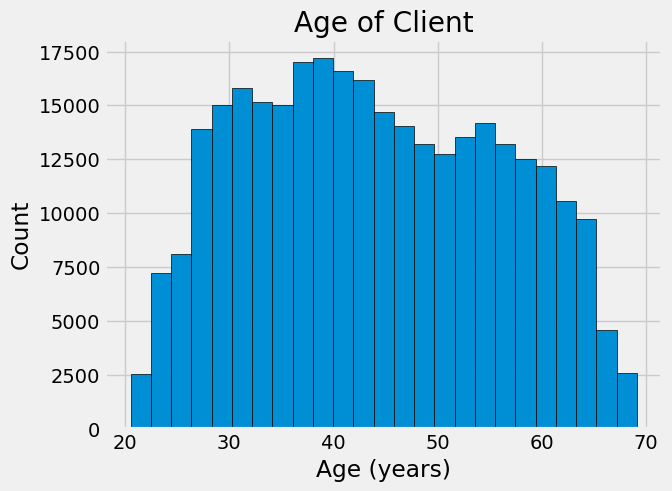

In [76]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(df_new['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

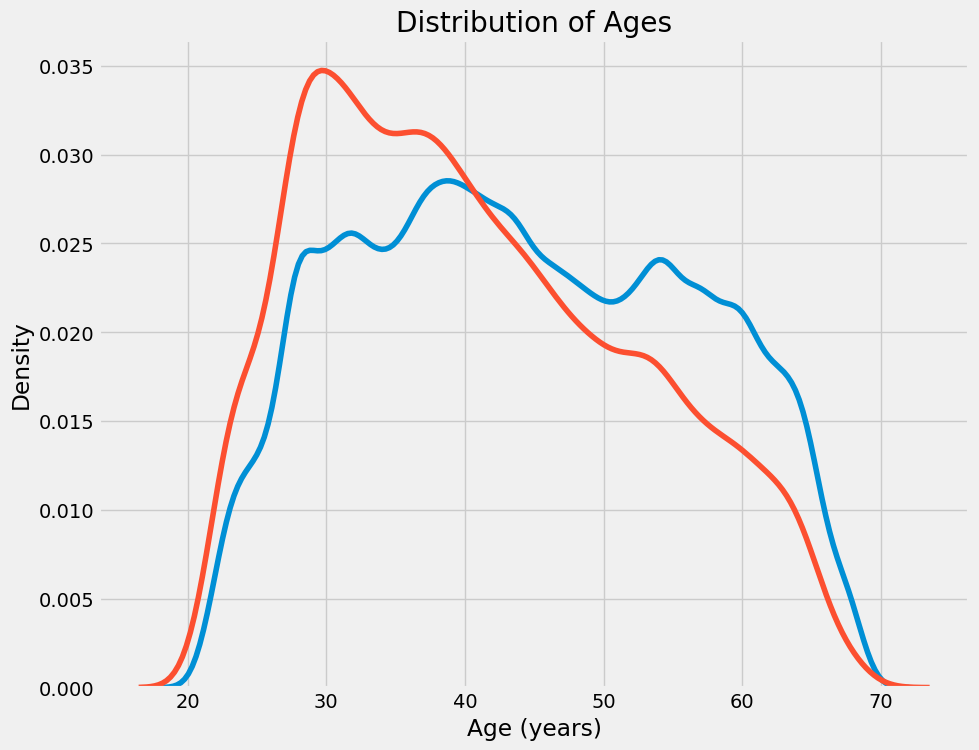

In [77]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df_new.loc[df_new['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df_new.loc[df_new['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

Line Blue = Target 0

Line Red = Target 1

The target == 1 curve skews towards the younger end of the range. Although this is not a significant correlation (-0.07 correlation coefficient), this variable is likely going to be useful in a machine learning model because it does affect the target. Let's look at this relationship in another way: average failure to repay loans by age bracket.

To make this graph, first we cut the age category into bins of 5 years each. Then, for each bin, we calculate the average value of the target, which tells us the ratio of loans that were not repaid in each age category.

In [78]:
# Age information into a separate dataframe
age_data = df_new[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


There is a clear trend: younger applicants are more likely to not repay the loan! The rate of failure to repay is above 10% for the youngest three age groups and beolow 5% for the oldest age group.

This is information that could be directly used by the bank: because younger clients are less likely to repay the loan, maybe they should be provided with more guidance or financial planning tips. This does not mean the bank should discriminate against younger clients, but it would be smart to take precautionary measures to help younger clients pay on time.

##### Negative Correlation 

The 3 variables with the strongest negative correlations with the target are EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3. According to the documentation, these features represent a "normalized score from external data source". I'm not sure what this exactly means, but it may be a cumulative sort of credit rating made using numerous sources of data.

Let's take a look at these variables.

First, I can show the correlations of the EXT_SOURCE features with the target and with each other.

In [79]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = df_new[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


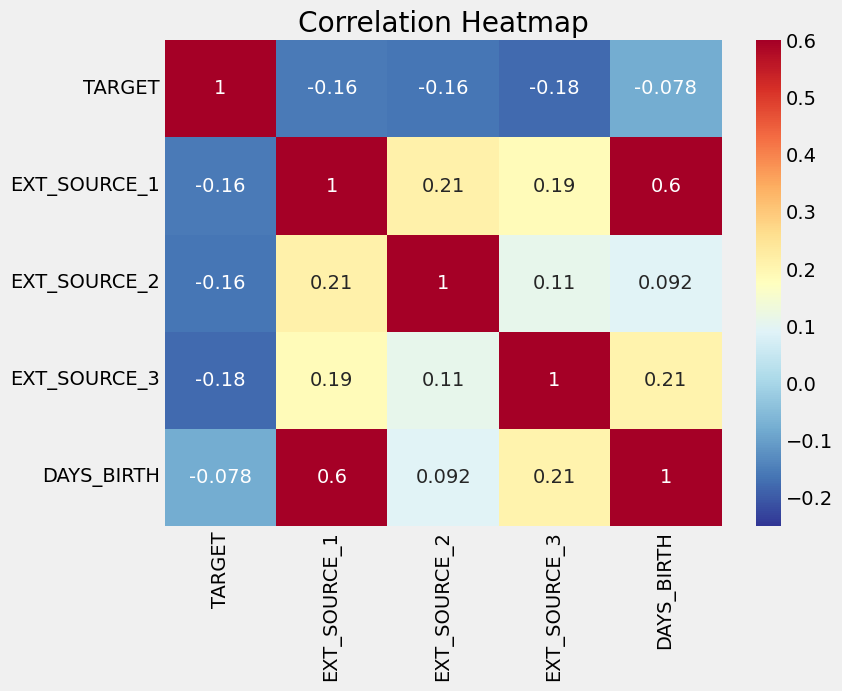

In [80]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

All three EXT_SOURCE featureshave negative correlations with the target, indicating that as the value of the EXT_SOURCE increases, the client is more likely to repay the loan. I can also see that DAYS_BIRTH is positively correlated with EXT_SOURCE_1 indicating that maybe one of the factors in this score is the client age.

## Conclusion

In this study I did the characterization of the dataset: size; number of attributes; has/does not have missing values, number of observations, etc.

I used the Data Preparation/Evaluation Methods Application and Exploratory Data Analysis Views.

I introduced sizing and feature engineering as needed, detailing the decisions and rationale behind the chosen techniques.